In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import scipy.io
import os

In [2]:
from sklearn import svm  #library to support vector machine

In [3]:
data = scipy.io.loadmat('Data/ex6data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [4]:
X = data['X']
y = data['y']

In [5]:
X

array([[1.9643  , 4.5957  ],
       [2.2753  , 3.8589  ],
       [2.9781  , 4.5651  ],
       [2.932   , 3.5519  ],
       [3.5772  , 2.856   ],
       [4.015   , 3.1937  ],
       [3.3814  , 3.4291  ],
       [3.9113  , 4.1761  ],
       [2.7822  , 4.0431  ],
       [2.5518  , 4.6162  ],
       [3.3698  , 3.9101  ],
       [3.1048  , 3.0709  ],
       [1.9182  , 4.0534  ],
       [2.2638  , 4.3706  ],
       [2.6555  , 3.5008  ],
       [3.1855  , 4.2888  ],
       [3.6579  , 3.8692  ],
       [3.9113  , 3.4291  ],
       [3.6002  , 3.1221  ],
       [3.0357  , 3.3165  ],
       [1.5841  , 3.3575  ],
       [2.0103  , 3.2039  ],
       [1.9527  , 2.7843  ],
       [2.2753  , 2.7127  ],
       [2.3099  , 2.9584  ],
       [2.8283  , 2.6309  ],
       [3.0473  , 2.2931  ],
       [2.4827  , 2.0373  ],
       [2.5057  , 2.3853  ],
       [1.8721  , 2.0577  ],
       [2.0103  , 2.3546  ],
       [1.2269  , 2.3239  ],
       [1.8951  , 2.9174  ],
       [1.561   , 3.0709  ],
       [1.5495

In [6]:
y

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1]], dtype=uint8)

In [7]:
y = y[:,0]
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1], dtype=uint8)

In [8]:
# pos = np.where(y == 1)
# neg = np.where(y==0)
pos = np.argwhere(y==1)
neg = np.argwhere(y==0)

In [9]:
pos

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [50]], dtype=int64)

In [10]:
X[pos, 1].shape

(21, 1)

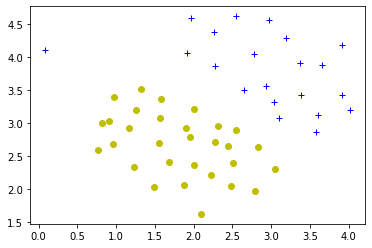

In [11]:
plt.plot(X[pos, 0], X[pos, 1], 'b+')
plt.plot(X[neg, 0], X[neg, 1], 'yo')

# Linear Kernel

### $C = 1$

In [12]:
penalty = 1.0  # SVM regularization parameter
clf = svm.SVC(kernel='linear', C=penalty)
clf.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

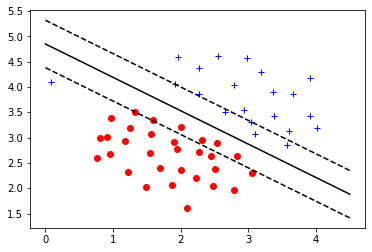

In [13]:
#data
plt.plot(X[pos, 0], X[pos, 1], 'b+')
plt.plot(X[neg, 0], X[neg, 1], 'ro')
#large margin classifier
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 4.5)
yy = a * xx - (clf.intercept_[0]) / w[1]
plt.plot(xx, yy, 'k-')
#upper line
yy_minus = a * xx - (clf.intercept_[0] - 1) / w[1]
plt.plot(xx, yy_minus, 'k--')
#lower line
yy_plus = a * xx - (clf.intercept_[0] + 1) / w[1]
plt.plot(xx, yy_plus, 'k--')

In [14]:
clf.predict(X[0:1,:])
#clf.predict(X)

array([1], dtype=uint8)

### $C = 100$

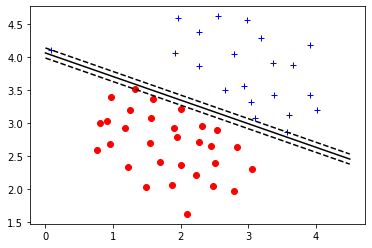

In [15]:
penalty = 100  # SVM regularization parameter
clf = svm.SVC(kernel='linear', C=penalty)
clf.fit(X,y)
#data
plt.plot(X[pos, 0], X[pos, 1], 'b+')
plt.plot(X[neg, 0], X[neg, 1], 'ro')
#large margin classifier
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 4.5)
yy = a * xx - (clf.intercept_[0]) / w[1]
plt.plot(xx, yy, 'k-')
#upper line
yy_minus = a * xx - (clf.intercept_[0] - 1) / w[1]
plt.plot(xx, yy_minus, 'k--')
#lower line
yy_plus = a * xx - (clf.intercept_[0] + 1) / w[1]
plt.plot(xx, yy_plus, 'k--')

# Radial Basis Function (RBF)

In [16]:
#Similarity Function
def similarity(x, l, sigma):
    K = np.exp(-0.5*np.linalg.norm(x - l)**2/sigma**2)
    return K

In [17]:
x1 = np.array([1.0, 2.0, 1.0])
x2 = np.array([0.0, 4.0, -1.0])
sigma = 2

similarity(x1, x2, sigma)

0.32465246735834974

In [18]:
penalty = 100  # SVM regularization parameter
clf = svm.SVC(kernel='rbf', C=penalty, gamma=10)
clf.fit(X,y)
clf.score(X, y)

1.0

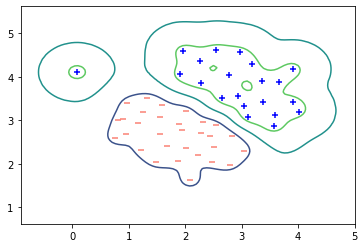

In [19]:
#data
plt.scatter(X[pos, 0], X[pos, 1], color='blue', marker = '+')
plt.scatter(X[neg, 0], X[neg, 1], color = 'salmon', marker = '_')

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) #is a matrix of dimensions of xx and yy (same dimensions)
Z = Z.reshape(xx.shape)
#plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, levels = 2, alpha=0.5) #alpha is the color: 0 transparent, 1 opaque
plt.contour(xx, yy, Z, levels = 2) 

In [20]:
xx[40,40]

1.4817969191919191

In [21]:
yy[40,40]

2.637295959595959

In [22]:
Z[40, 40]

-0.9754539620259135

# Second dataset

In [23]:
data2 = scipy.io.loadmat('Data/ex6Data2.mat')
data2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [24]:
X = data2['X']
y = data2['y']
y = y[:,0]
pos = np.argwhere(y==1)
neg = np.argwhere(y==0)

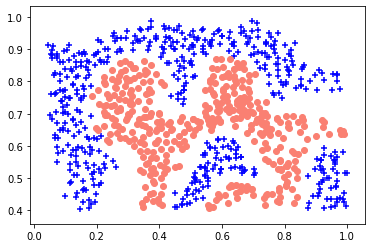

In [25]:
plt.scatter(X[pos, 0], X[pos, 1], color='blue', marker = '+')
plt.scatter(X[neg, 0], X[neg, 1], color = 'salmon', marker = 'o')

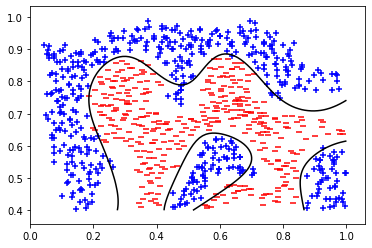

In [26]:
penalty = 100  # SVM regularization parameter
clf = svm.SVC(kernel='rbf', C=penalty, gamma=10)
clf.fit(X,y)
#plot data
plt.scatter(X[pos, 0], X[pos, 1], color='blue', marker = '+')
plt.scatter(X[neg, 0], X[neg, 1], color = 'red', marker = '_')
#plot boundary decision
x_min, x_max = 0, 1
y_min, y_max = 0.4, 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) #is a matrix of dimensions of xx and yy (same dimensions)
Z = Z.reshape(xx.shape)
#plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, levels = 0, alpha=0.5)
plt.contour(xx, yy, Z, levels = 0, colors = 'black') 
#plt.pcolormesh(xx, yy, Z, cmap=plt.cm.RdBu)

In [27]:
clf.score(X, y)

0.9698725376593279

# Third dataset

In [28]:
data3 = scipy.io.loadmat('Data/ex6data3.mat')
data3.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])

In [29]:
X = data3['X']
y = data3['y']
Xval = data3['Xval']
yval = data3['yval']

In [30]:
y = y[:,0]
yval = yval[:,0]

In [31]:
print(f'training set size {y.shape}')
print(f'cross validation set size {yval.shape}')

training set size (211,)
cross validation set size (200,)


In [32]:
C_subset = [0.01, 0.03, 0.05, 0.1, 0.5, 1, 2, 4, 8, 20, 50, 100]
sigma_subset = [0.01, 0.03, 0.05, 0.1, 0.5, 1, 2, 4, 8, 20, 50, 100]

In [33]:
#there are len(C_subset) x len(sigma_subset) different models
best_accuracy = 0
for c in C_subset:
    for sigma in sigma_subset:
        #training data
        clf = svm.SVC(kernel = 'rbf', C = c, gamma=sigma)
        clf.fit(X, y)
        
        #cross-validation
        actual_accuracy = clf.score(Xval, yval)
        if actual_accuracy > best_accuracy:
            best_accuracy = actual_accuracy
            best_parameters = np.array([c, sigma])
print(f'score cross validation = {best_accuracy}')
print(f'C, sigma = {best_parameters}')

score cross validation = 0.965
C, sigma = [ 1 50]


In [34]:
best_parameters

array([ 1, 50])

score cross validation = 0.9478672985781991


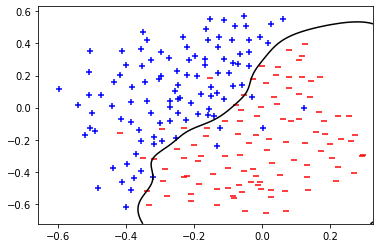

In [35]:
#plot boundary decision
clf = svm.SVC(kernel='rbf', C=best_parameters[0], gamma=best_parameters[1])
clf.fit(X,y)
print(f'score cross validation = {clf.score(X,y)}')
#plot data
pos = np.argwhere(y==1)
neg = np.argwhere(y==0)
plt.scatter(X[pos, 0], X[pos, 1], color='blue', marker = '+')
plt.scatter(X[neg, 0], X[neg, 1], color = 'red', marker = '_')
#plot boundary decision
x1_min, x1_max = np.min(X[:,0]) - np.abs(np.min(X[:,0]))/10, np.max(X[:,0]) + np.abs(np.max(X[:,0]))/10
x2_min, x2_max = np.min(X[:,1]) - np.abs(np.min(X[:,1]))/10, np.max(X[:,1]) + np.abs(np.max(X[:,1]))/10
#x1_min, x1_max = np.min(X[:,0]), np.max(X[:,0]) #0.4 
#x2_min, x2_max = np.min(X[:,1]), np.max(X[:,1]) #0.6
xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) #is a matrix of dimensions of xx and yy (same dimensions)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels = 0, colors = 'black') 

# Spam Classification

In [36]:
os.listdir('Data')

['emailSample1.txt',
 'emailSample2.txt',
 'ex6data1.mat',
 'ex6data2.mat',
 'ex6data3.mat',
 'spamSample1.txt',
 'spamSample2.txt',
 'spamTest.mat',
 'spamTrain.mat',
 'vocab.txt']

In [37]:
import pandas as pd

In [38]:
vocab = pd.read_csv('Data/vocab.txt', names = ['index', 'word'], sep='\t')
vocab

,index,word
0,1,aa
1,2,ab
2,3,abil
3,4,abl
4,5,about
...,...,...
1894,1895,your
1895,1896,yourself
1896,1897,zdnet
1897,1898,zero


In [39]:
vocab['index'] = vocab['index'] - 1
vocab

,index,word
0,0,aa
1,1,ab
2,2,abil
3,3,abl
4,4,about
...,...,...
1894,1894,your
1895,1895,yourself
1896,1896,zdnet
1897,1897,zero


In [40]:
data_loadtxt = np.genfromtxt('Data/vocab.txt', dtype='str') #np.loadtxt doesn't work with stings
data_loadtxt

array([['1', 'aa'],
       ['2', 'ab'],
       ['3', 'abil'],
       ...,
       ['1897', 'zdnet'],
       ['1898', 'zero'],
       ['1899', 'zip']], dtype='<U40')

In [41]:
spamTrain = scipy.io.loadmat('Data/spamTrain.mat')
spamTest  = scipy.io.loadmat('Data/spamTest.mat')
spamTrain.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [42]:
X = spamTrain['X'] #i should create X and y using the emails
y = spamTrain['y']
Xtest = spamTest['Xtest']
ytest = spamTest['ytest']

In [43]:
y = y[:,0]
ytest = ytest[:,0]

In [44]:
#map vocabulary list into work indices for sample email
X.shape

(4000, 1899)

In [45]:
clf = svm.SVC(kernel = 'linear', C=0.1)
clf.fit(X,y)
training_accuracy = clf.score(X, y)
test_accuracy = clf.score(Xtest, ytest)
print(f'training accuracy = {training_accuracy*100}%')
print(f'test accuracy = {test_accuracy*100}%')

training accuracy = 99.825%
test accuracy = 98.9%
